Prerequisites:

1. Python installed on your machine
2. IMAP enabled on your GMail account

https://support.google.com/mail/answer/7126229?hl=en&visit_id=637177001473668491-1701524355&rd=1

Also Turn ON : 
1. https://accounts.google.com/DisplayUnlockCaptcha
2. https://myaccount.google.com/lesssecureapps
 

In [21]:
import imaplib
import os
import email
import matplotlib.pyplot as plt

EMAIL_DATASET_PATH = os.path.join(os.getcwd(), 'emails')
if not os.path.exists(EMAIL_DATASET_PATH):
    os.mkdir(EMAIL_DATASET_PATH)
mail = imaplib.IMAP4_SSL('imap.gmail.com')
# imaplib module implements connection based on IMAPv4 protocol
mail.login("nidhisharma0059@gmail.com", "kmkmkmkmkmayur")
# >> ('OK', [username at gmail.com Vineet authenticated (Success)'])

('OK', [b'nidhisharma0059@gmail.com authenticated (Success)'])

In [22]:
mail.list() # Lists all labels in GMail
mail.select('inbox') # Connected to inbox.

('OK', [b'19094'])

In [24]:
# result, data = mail.uid('search', None, "ALL")
# # search and return uids instead
# i = len(data[0].split()) # data[0] is a space separate string
# for x in range(i):
#     latest_email_uid = data[0].split()[x] # unique ids wrt label selected
#     result, email_data = mail.uid('fetch', latest_email_uid, '(RFC822)')
#     # fetch the email body (RFC822) for the given ID
#     raw_email = email_data[0][1]

#     #continue inside the same for loop as above
#     raw_email_string = raw_email.decode('utf-8')
#     # converts byte literal to string removing b''
#     email_message = email.message_from_string(raw_email_string)
#     # this will loop through all the available multiparts in mail
#     for part in email_message.walk():
#         if part.get_content_type() == "text/plain": # ignore attachments/html
#             body = part.get_payload(decode=True)
#             save_string = str("email_" + str(x) + ".eml")
#             with open(os.path.join(EMAIL_DATASET_PATH, save_string), 'a') as file:
#                 file.write(str(body))
#                 print(str(x) + ' email is saved')
# #             body.decode('utf-8')
#         else:
#          continue
        
# #     if x == 1000:
# #         break

In [25]:
# !pip install wordcloud

In [26]:
filedata = ''

for emailpath in os.listdir(EMAIL_DATASET_PATH):
    with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
        lines = file.readlines()
        for line in lines:
            filedata+=line
print('Processed!!')

Processed!!


In [27]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=100, \
                      background_color="white").generate(filedata)


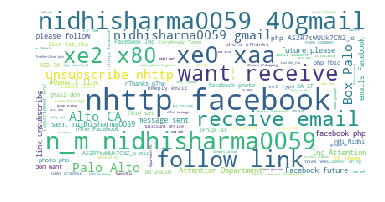

In [30]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

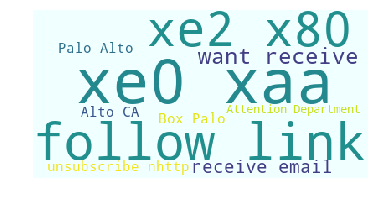

In [31]:
#Add more words to ignore 
stopwords.update(["nidhisharma0059","40gmail", "facebook", "value"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=10, \
                      background_color="azure").generate(filedata)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYEAAADKCAYAAABDsfw/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsnXV4VEf3x7/rkmSTbNw9eHB3dygFCoVCkSptKbW371uqvyo1aKlShVKsOMU1aHAIECTubpus2++PJWHv3rub9STkfvr0edi5MufOTO65c+bMOQy9Xg8aGhoamrYJs7kFoKGhoaFpPmglQENDQ9OGoZUADQ0NTRuGVgI0NDQ0bRhaCdDQ0NC0YWglQENDQ9OGoZUADQ0NTRuGVgI0NDQ0bRhaCdDQ0NC0YdjNLQAA1AL0tmUaGhoaG/EGGI7eo0UoARqah5HS+jqsPHUSWZVVKK2rg1StAo/FQpy/P7qFhqJXeAQGRkWDxaQn5Pbyy4XzuFZUiLzqatQqFJCp1QgTeSPOzw9dQ0MxNDYO0b6+Tq2zXFqPj44cQWZlJarkMqi0WnhwuAgReeH5/gMwKDqmVfUpoyXEDqJnAjQPE2dzc7D20iVczM9rcmCHiER4smcvzOrazS2yPSyk5OXix3NnkVpcbPE8BoB+UVH4Ydp0h+uUKBX49vRp7Lp1Exqdzux5oSIRlg4cjLHt2jlcZ1M4YyZAKwEaGifRd/U3UGm1dl0bLRZj3azH4cXjOVmqhweVVotX9+zGmZxsu66f3bUb3hw+wubr7pWXY9E/myFVqWy+dmhsHFZNmWrzddZCm4NoaFoAWp0Oyw/up1QAXjwe+kdFIczbB4GenlBrtNh8/RoKJbWE83KqqvDG3j346dEZ7hK71fHFieOUCiBGLEafiEiEibzB57BxvagIKXm5qJTJCOdtun4NMWI/PNa1q031vrx7J0kBcFksDI+LR7RYDB8+H8V1dbhZUowrhYWE85KzMm2qqzmglQANjYOwmEz48gWk8h5h4fh5+gywTezDc3v0wL+30/DZ8WOQq9WN5efz8nA0Ix0j4xNcLnNr41ZpCbbfvEEqXz11GgbFxBDKZiZ1hUanw7Ybqfjm9ClCG39/9gzGJCbCR0DuL3OU1NWRyvYtfhp+QiGpfPq6tciqqiSU3SguRpeQEKvrczetZ/WChqYF88aw4Y3/DhN5Y/XUafht5mMkBQAATAYDUzp2wprpM8FlsQjHfk4553JZWyObrl2DzsR07efhQVIADbCZTMzq2g2rp04j9IFEqcDeO7etrjezspJU9ljXrpQKAAD+mDULHQKDCGVfn0q2ur7mgFYCNDROgMlgIDEgACPi47Fx7hNmX07GdA4OxrP9+hPK0isqSKYiGuBkVhap7KUBg5q8rmd4OGZ0SSKUnci03kSz7vIlwu9osRivDxlm9nwRj49Pxo0Hx0i5XysqwuWCAqvrdDe0EqChcRKb587DV5Om2LS4u6h3H3QPDSOUbb9BNnu0dSRKBeF3hI8PpnbqZNW1Lw4kKovLBfnQWvDuaWD/nTvYnXar8Xe4tw+2z19AeMFTES0WY8/CRYQV2xd2bieYpVoS9JoATZugXqnE8cxMXMjPQ3pFOTIqK8Fns+ErEMLfQ4huoWF4YcBASvONqwkViXC16MGCYrVc7nYZWht8NsfqcwUc4rl6AFq9HpZf5cBpk0XoEfHxVrviBHl6oUtISKMLq1KjwbncXIyIj7fyDu6DVgI0TudoRjpe/3cPoWxR7z54aWDT03dj9ACWbN+GlLzcxjI+m42/58xFrNjP6vt8fuI4tt+8AaVGQyiXqlSQqlQoqK3BtaIiHLh7B8/3H4BJHTqCyXDY885q+CYvKbWdbqaupvuqr0lltvars/q0Si5r+qT7lNXXE357cLmktRgqrhQSTTi9wyOsrhMA+kREEvYxXCzIb5FKgDYH0TidkfEJmJlEdMP789JF0h9VU6y/cpnwsgCAN4ePsOllkZyViY3XrpIUABUldXV479BBzN+0ERVSqU2yOkKdialDxOe7rW5bMO1TwNCvtmBvn3pwuYTflVIpiiQSq+q8kJ9H+N0xKMjMmcT7m3oFdQ4Otqq+BpJMPIKuFxWaObN5oZUAjUt4fchQJAYENP7W6fVYfmA/6pRKq65PryjHd2dOE8rGtWuPRzp1tlqGTdeu4tU9u60+v4FbpSWYt2kDpWeIKzB9mUX5ODfMgbMw7VPA0K/u6NOB0dGksh0ULqOm6PR6bLh6hVA2OCa2yesyTPpeLBTa5FYKAAn+xLbKrKoieTi1BOgdwzQuZXfaLbx36CCh7KOx4zCxQ0ez13x2/Bg2X79GKNsw5wl0CAy0qs5CSS0e+2sdZEYLcR0Cg/C/ESPQJZjaX7tGLsfwn38klV9d9qpVddpLclYmlu3e1fjbRyDA0Weec6s5ylbs6VOAbE7islg4/9LLVtf77LatpK/6TXPnoZ2JYmpg562b+L/DhwgvlzeGDsOc7j2arOvb06fwh9EsZ3RCIj6fOMlqWRuY9PtvBG+vnx6dgb6RkTbfxxzO2DFMzwRoXMqUjp0woX0HQtmnx4+ZdYM8nZ1NUgAArFYAegDvHTpIUAADo2Pwx2OzzCoAwPDyfb7/AFL5qWyya6Iz2XHzJuH3qPiEFq0AANv7FDD0qymvDB5iU73vjh4NTxPPq/mbN+Lvq1cIX9hKjQZfJJ/AByYKYGR8Ah63QgEA5HUEX6Fts4AGxCb7CYrrrDNhuRNaCdC4nOUjRxF+S1UqLN+/n/Lc9w4fJJUNj7N+Me1kVibJJ/uz8RPAYzftA/FUn77oFhpKKPv94gWr67aV22WlpLACVHb3lsjykaMQaWS2auhTKnNHlUxG6tfhcfGY3a27TXWGibzx+YRJBBdNlUaDL5NPYPbf65GclQmdXo/p69aSTEBDY2Px8bjxVn8215qs03jz7Fun8RYQr6tVKMyc2XzQSoDG5Qg5HJJv9fXiIspzq0zivYSIRHh/zBir66KaRZh+PZqDyWDgyZ69CWXXiopwr7zc6vqtRavT4aOjRwhlg2JiSDb3loqQw8GKCRMJ/Xq9uAi/XjhPOvf9w4cI/WprnxrTPyoKX02aDKGJR1V6RTmW7d6FoT/9QJqRMBkMfD15qlUfAg3Um6xzCEwWpq1FYOLKau36iTuhlQCNW6Ca+t8wCQO8yeQFzmIy8dn4iRDZ8BWWkkv0PLHlWgAYEhtL8is3tUM7g98uXkBaaWnjbw6LhdcGD3V6Pa6kfWAgqV/XnE8h9Oum69cIJjV7+tSUwTGx+OOx2ZR5Akxf3h0Cg/DbzFk2m9gUJt5kfBsUiDGmY6klbhijlQCNW3i8W3eceG4Jgr28Gsvmb96I9w4dhEqrxay//8KK48cajw2IisbFpctIbnZNYWqMeKpvX5uuZzIYGGFifvonNdWmezTFyDU/4cdzZwllKS8uRbRY7NR63MHj3boT+lSr02H+5o1O7VNT9AAuFxagStb0prrbZaX4J/W6zXWYKgEOs+l9BVSYzoAVtBKgact48/n4ZPwEwlfZ7rRbeG7bVoLJxd/DAx/ZYL+1RKSPj83XmJqPahXO28ErV6tJJi8/obDFLwZbwrRPAZD6FIBT+rRSKsWz2/7B5yeOE0JJsJlMTGjfgaCQGth357bNszk2g/hqtNe10zQ8RUvMOEbvGKZxK91Dw/Bc/wH44eyZxjLjkAlMBgOfjJsAXxt9sgHqnbbG7pf2IlEooNPrHX5R6/R6/G//PkIZm8nEF5MmO3Tf5qapPgUM/WpPnxqTX1OD57dvI9n8B8XE4M1hwxHu7QOVVotxv64hhd5YsmM73hoxEo927mJVXWwW8WWt1Tcda4gK0+uaijvUHLQ8tUTz0LO4dx/0iaD2lX66bz/0jrBte34DEhctuukBq3YcN8UXySdI3kDLR44iBZBrjVjqU8DQr45QI5fjue1bSQrg7ZGjsHrqNIR7G2Z8XBYLuxcswmNduxKUtlanw4dHDlttGjJd0LXXjKNQE8eNLYvT7oJWAjRuh8lg4ONx4ymPPePAy6LOhe53ju5m/OPSRWy6dpVQtrBXb5t2QLdkGvrU1C8eMIRzdqRfAWD5gf2kndU8NhvTTcJEAwZz3v+Gj8RPj86Av4cH4dhnx4+RwlZQIeITTYL2LujKTK4TtcD0obQSoGkWzP0xOGJyqVO1PPc7ANh75zZWnz5FKBvbrh1eGjS4mSRyDSIeD2IBWQlE+vg6bEo7m5tDKvtk3ASL1/SOiMBfs+cgysiLSKfX44PDh5rMF+xtkinOdN+AtZiuJ3m3wLhQLW9uQvPQQxVltIHBP36PTXOfQJjI2+b7CjlkX+51sx+3uFPY1fT/7luSp8npJS+SAqK1diz16Y6bN3A4/R5OPf+CXfcuNpkBMBkM7FqwsNEEZIlgLy/sfHIhIWRFSV0dZq5fh32LnjJ7XfewMEIugdulZTbLrdPrcaeMeF1SSKiZs5sPeiZA41aKJBJ8cPgQoczYZ7xeqcT/9u2DxoqkH6aYTv0BoFbefDs00ysqSAogVuz30CmApvoUMPSrPX0KGDbsGdM5ONgqBWCMqS3eVLGYYhrVtKC2xqb6AEPoCeNnZjIYiLDDW83V0EqAxm1odTr8d/9ewq7JTkHB2DT3CcI0+UZJMSnapDVQTbWzq6vsE9ZBiiQSLNmxjVAWJvLGT9OnN4s8rsS0TwGQ+hSAXX0KAPkmL2B7ZnadrAgfbUycnx/BhFUtl9uc7Ce9gugiG+njY1UeA3dDKwEat7H6zGnCblIhh4NPx09AiEiEd0cRwwisu3wJZ3NyHK7zZklx0yc5mSqZDM9t30rISeDv4YGfps9AgIen2+VxNaY7v4UcjlP71FTB2ONqamsYaA8uF3F+/oQyW8eSabt0bkazpCVoJUDjFs7m5pCSdr85fETj9HhEfDymGflw6wG8c+iAw8ldLubnO3S9rUhVKrywczvyax58vXrz+fjp0RkI97Z9naOlQ7Vg++bwEQCc16emIRtUdmReq1daXgimold4OOH3xQLbxtJ5kw1qPU3u11KglQCNy9Hp9Xhhx3aCm2WwlxemdCQmCn931GhCjt8qmQyjf/mZMiiZOToEEqf91XK529I1vrJnFwb98B1hMfCXGTNx4rkliPOzPhtaa0Cn1+PZbVvxwo7tjWXBXl44+fwLhH59d9RobJgzt7Ff7elT0zAT/95Os9ll13THMNcKf/3Xhw4jrDP9dfkyZUhsKlafOU1ILdkjLKzFugPTSoDG5fxm8gdv8Cmndu9bMmAgqcw0zo4lFvfpQypbbact2lZOZBI3grGYTPSyMS9ta+G3C+cJL9aGPvWicP3tEBhE6tcfz50lLfiao7fJJrQiiQTHMtKtlpVKYfS1sLGtASaDQdph/NXJE03ORHKqq7H+ymVCGdV+hpYCrQRoXMqVwkL8lHKOULa4dx/0CKPeJftkz16kHcM6vZ4QJ8YSI+MTSNPuv65cxtenkm3+elRptbhdVtr0iQBWnTpJ+M1kMPDR2HE21tg6sLVPAUO/GmMIobHXqvqoInh+cuwoweRmDj2AlSeTSeXWfpU/bpLzIKe6Gl8mnzB7vkSpwNsH9hMURahIhNEJiVbV1xzQ+wTsYMiylQCAKQOS8PpjI5tFhknLf4REangxnlz1SrPI0BS1CgXe2r+PEHyrS3AInu3X3+w1TAYDH44dh1nr/yIk4Hj/0CF8PXmKVfV+MGYs5vz9N0Fx/HX5Ms7n5WFJ/wEYGB1DMDsZU1Zfj4v5eTifn4fkzCy8NWIkycRkyu60W1hrst4h4HCw784d7LtzxyqZqfh26iN2X+sq7OlTwNCv3nw+oU9NE7k3db1xnVUyGZ7YuAGHn3nWrMfNnbIyrDp9EufziKagXuERGBFvXaIiqgXlf1Kv49l+/eFHsTt60ZbNpNzUSwcNbpExgxpoU0rgkw0HceBCGphMBgK8PdE5JhQLx/VHZKBtib3//eR5PPv1RhdJ+YAhy1aib4dofPHsNNKxPR89jzq5wqIcEqkCFZJ6xIb4mz3Hlbx36ABK6x/8oXtwufhk/IQmIykGeXrhnVGjCZuPjmdmYNP1a5jdtVuT9YaJvPH15ClYsnM7VEZ++vfKDYlHhBwOxrVrDx+BAHoAMpUK9SoVTmdn2ZX5KaeK7IYqValcnpqyOTDtUwBW9SkAUp8CsLpP5/bogb8uE00sEqUCY375GT3CwpHg7w8fgQAcJgt3y8twvbgI6RUVpPuIhUK8O2p0k/UZ0yUkhOTpM+H3XzE8Ng4xYjG8+XyU1NXhZmkJSQEAwNjEdjbV527aVKL5TzYcxN28Uqz973wAwJ38Ujzz1Qa8+fgYTOzbqYmriTzxyZ/oFh/h0pnA55sO49DlO/jv42Mwqgf1QHrikz+x/q0FlMf+s2YnAn283D5buV1Wiic3byIsyI5r1x6fjre8zd8UuVqN2X+vR15NdWNZlK8vNsx5gpRZyhxFEgkm/v6rTfUa8+WkyRgZn2DxHNOk5M7C1UnubaXP6m9Ii+y29qsjfarV6fDLhfP49cJ5UojmpugSEoJPxk2w20OrpK4OS3ftoFQs5ugTEYkvJ02mXCdxFnSieQdJDA8Ek8lAcaUhMmF1vQzf7UzGE5/8idFvrMa0d9egora+ibuQuXQ3F8+t3Igpb/+Er/85Bpkd7mm1Ujn6dYxBUkwoTt3IsPn6Sct/REpaNnafTcWQZSsxZNlK0h/Opbu5GPXGaofkpOLNfXtJL4vlI2xXRIL7+wiMTTe51dX49NhRq+8RKhLhy0mT0Tk42Ka6xUIhZiZ1bVIBtBWkKhWpT0NEIpv71ZE+ZTGZeK5ff6yfPQejExLNmvRMifb1xR8zZznkohvs5YX1s+dgcZ++pGxhpoiFQrw5bDh+fHS6SxWAs2jTM4HiylrM+vB3vDJjBKYN6gq5Uo3PNh1C/w4xCA/wQUFFDU5cS8dnT08l3cvcTOBKej5e/XEbJvTphN7to7Dm3zPwE3ng2xdngsm0XmnvPX8Lw7slYG/KTfy67yz+/fh5cNhku6K5mUBJlQSv/bgd7SKD8MxEg2dGsFhEknPlkhmoqZfZLWdrIqeqCiezs5BaXIwL+XmQqdVgwBBzyIPHRd+ISMT7+6N3eAQSAgKcktSGxnVUSqX44dxZ3C4rQ7VchjqlEgqNBqEiEcJE3ugeFoaeYeHoER7u1L6sVSjw/uGDSC+vQKVMCpVWCwGHgxAvEZ7q0xfD4+KsckF1Bs6YCbSpNYEGFCoNcksrsXpHMjz4PAzrZvjaE/A4+ODJiY3ndY4JxTfbjtt079/2nUXn6FD8Z7bB7hgVJMaCFX/h5I0MDOtq/Vfl6dQMTOzbCQM6xWL1jmRcupeH/h1jrL4+WCwCm8WEkMclvPxN5eweH+6QnK2JaLG4VaZwpKHGz8MD79ho32+K52f/AK1Gi4+/n4+AIOqZgzefj5WTyR+GrZU2Zw7KLqnEmP+sxtNfbYBKo8HKF6bD15O8yt+AVKGy2v6o1mpxK7cY/TpGN5bFhvgjwMcTl+9Zn95OoVLj4v3zw/x9EBUkxqlU201CrpaThuZho6y4BpXldUhPs24Pw8NAm5sJxAT7NZqDTFm59RgOX76Dlx8djq5xYfATkaNSWoJx/z9HLWxfbjmKYLEI52/nAABmDu2OL7ccxbg+HZEU63gWKmfJSdNyyM4oxeuLf8MTzwzHtLmW3TVpzLMt+a3mFsHttLmZgCXO3MzCqB7tMbZ3BwSLRZQ2eEuwWUwkxYUhJe3B1vKs4gqU19Q3ml2aQqvT4VxaNoYlJaBvh2j07RCNyf2T4OslxKnUzKZvYASfy4GSIiOSM+SkaVlcv2hdOAMaGlNoJWBEeIAPrqTn4VZOMTKLKvDX4QuU59XUy6HV6aFQqSGRKQjmoqcnDMDtvBKs2HQYJ66nY/lve9A+MghDrbSzX80oQJ1MgUFd4hrLGAxgQKdYnDTyElJrtY1ymMrQQMfoYJy5mYWTqRm4k0/c+dog59WMArvkpGlZXLvw8O1JoHEPbdo7yJSC8hp8ueUI0nKLwWaxMKhzHA5cTMPxr19u3Azzy94zlMrBeNfutYwC/PzvaRSU12Bwlzg8P2UwvITWpZVbufUYTqZmYPsHz8A4I9/pG5l467fdOLnqFbMyfLBgIoZ3e7A9XSJT4Kt/juLS3TzodHrs/2wJ4fxrGQV47aftEPK4Nsv5MKPXA/MmfgW5VEkwD2z6/ST+WWuIQ2RcvmvTeaz78SihrLSoBicP38S+bZcgrVeAw2UjKMQHXXpGY+GLo0h1zh61AgwmAxsOvIHK8jpsXXcaxw/eAI/HQXR8EMZO7Y6BIzoSrqksr8O2v84gJ7MMd28WmH2eTYf/Aw7XccvvNx/txsnDN/H2F7PRvU8s7qUVYtfGFFw6lwGRtwBx7UIwa9EQxMSTd1jXS+R49+W/UVJk2B8QHOaL/kPbY+aTgyzWmXWvBId2XcHpY2nQqLUQ+QjhH+SNLj2iMGJ8VwSFkpO0bPg1GZfOpBPq+vi7+RAIqZP5rP3hKHZvJsa3Wvnn04iMCaA8f/mL6xAR5Y/n3qDeH1Ffp8Diad9Ao9bi1fceIfWbvW1BBe0dZCNvzRlr8Xh4gA9WvTCDeM1c4jVPTxyIpyeSg5wZ0y0+HD8um22XjK/MGIFXZowglQ/qEteoaKyRAQBEQj7B24lKzqNfLrVLzocZBgOITQjGrWvEhOR3blC/aHMyibOsijIJXpz7I3Q6PRgMgC/gQi5TITerDLlZZRg7pTtCI8lRRVVKDS6nZODbj/dAWq8Al8eGtF6BW9dycetaLvKyy/H44qGN50tqZbh7yyATh8OCWq2Fr58nvH2Jjg4MB/P7mlJVXoeTh27iuxX/QqsxzECrKupRVZGOec+Rx27GnWJ8/OZmSGpk4PE50On0yM0sQ25mGYaM7kz5Itfr9Fj74zHs2UJ8OVeW16GyvA53bxaQXq4NdW376wwAEOp6ffFvePerxynr6pAUAUmNDJJaGa6kNG1yHTG+K/78/ggWvzyGUrmeua+wPL346DOYuMnTnrZwNW1KCdDQWEt8e6IS0On0uJdWiJiEIGSnE1/6OSa//QNFGDSqE0TeQsx5aih4fA4UchWSD93Eb98ewt+/JuON/3uUst4v3t0OsZ8nlr07Fd37xKEwrwI/fbkft1PzsW39WYyc0BWBIYYXRUx8EL76zZAn96V5P6MorxITp/d2+cLwhdP3cP1iFvoPbY+JM3ojONQX+TnluHElF2Emyq2mStr40vv6j6cQFRsIvR64d6sAP3yxDyuWb8UXvywCi020TG/8/WSjAujRLw5Ll08Bh8NCZXkdbqfmoyC3kvSl3lBXUs8YLHhxJKGut15YZ7auPoMS0WeQYQY9fegnTT7/gOEd8MPne3Hh9D1KRZR88AYAYOCIjuBwHqwr2tsWroZeE6ChoWDMlB6E3/t3XIJSocb850cgqWcMFHLD7urs9FLkZZejS89owvkvL5+ChS+OAo9v2F3KF3AxdmoPvPb+NKQk32n8gjal98AE/Lj5BfToGwcGAwiP8sdHq+chMiYAep0eB3Zdcf7D2sjNq7n4c88reOXdR5DYMQwiHyE6dYvC7EVDCOfpdHq8+MRPkNTI8NTLYxAVGwjAMNNq1zkc36x9BrlZZfjy/e2E63ZsOIdtf50Bj8/Bur2vYvmKWfASCcAXcBEW6YdRk7phwQsjzdb13tePk+rq0CWCsi57aDArrfpwF2qqiQlyNv9xCndvFSI82h/PvPogiqy9beEOaCVAQ0NBcJgvPL340GoNL+sGU1BMQjDi2gcj/bbBjzw7wzALiG9nXepAkY/BVKMzs/ekXSdqF2BvscFdWaXUUB53J3HtQsAXUNvXjcnPLodcakgNmdDRvGtzQQ4xHs+9tEIAQPvO4fDwtG6NyrguKoLDfSnrspfAYG/odHqcOnyTUH7ykOH3iPFdzcpnS1u4A9ocRENjhpjEYBTmGcwOd24UICDIG14iARI6hOJeWhG69IhGToMSaE9UAlqtDhdO3cPuzedRU1UPmVQJlUoDtdpyQhJvnyb2prQARw5vH/ObK42pqXrwlfzms3+YPa++jhi5tfb+df5B5J3u1tRlyaRjWpe9DB3bBf+sPY0TB29g8mN9G8tLiqrBYjExdAwxX4G9beEOaCVAQ2OGuMRg5GeXQ+jBQ1VFHQaNNNh/EzuG4fj+VABAToYhlWSckRIoyKnAire3oii/Ct6+HggNFyM6QQA+n4t6iRxXzptffGSyWv7knGFlbCnj+P+eIoFZNxZPL+LXfsN1TBsWtI3r8hKZTypvWpe9jBifhK3rTiMnoww5GWWIjg9sPNa9byx8xERlbm9buANaCdC0GPKqa/Bd8mlkVlaiSiqDVKUCm8mEJ4+H4Ynx6B8dhX7RUeBz3DNs49qHID+7otEDpF1nw0Y6Xz9PZNwxxJfPzy6HyFvYGGdGr9M3KoDwaH98s/YZwj2vX8q2qAQeJoxnDJ/9+CRCwq2L2yTyNlxXWW590hnjuv7c4/okS4EhPujYNQq3ruUi+dANRMePbFznGW5iCjKVz5a2cAct/7OD5qFFqlLhnb0H0PPzlej5+UpM++UPHL2XjpzKKkgUhg1wSo0GlVIptl69jtd27MbAlavR8/OVGPP9GpfLN2BYB1y9kInjB1LB43MwduqDxeLqynr8s/Y0JLUyjH3kQXlaah6K8g1JZl5/n5gMSK8HdvxNTMvoLDw8DSGLS4uqmzjTfcQmBmPMFEN6xi/esX7Bc8GSkWAwGbhyPhN/fm9d2HDjuty1brJ8xWPgC7jYvfk8bt/Ixy8rD2Di9N7oN4Sc+8PetnAHtBKgaTYWrt+Efbdu23VtpVSKtecvNX2ig5QV1yInvRTx7UPAMjHVXDxjSHYeZ7QoHBEd0BiKe+emlMbyovwqfP7OVty+ke8SORPvLzYmH76JqxeyoNfpodPpUV1pez4MZzJr4RD4+nkiN6sMKSfvoqZaCpVSg4pSCe6lFeKtJWsblWYDoZF+GHdf4e7Zch5fvb8DMqkSCrkKJYXVuHgmHWu+PoDcrDLKut5aspZU165N5ynrcgQaWLRPAAAgAElEQVQen4MBw9oDAC6fzcDFM+kYPt58Qnl72sId0OYgmmahVq5AZgU5FZ8tfJt8CiwmA0/07ukkqcjU3ncBHDSKmHmOzWEh867BJGSsBEQ+QkyZ1Rc7N6bgxIEbSE8rQm2NDPUSOQQePLy/cg7efvEvp8s5ZVZfnDp8C5JaGT56YxM4HBY0Wh24XDY2HHzD6fVZi4/YA+999Tg+e2srvnhnG+U5VFELFr44GgqFGsf3p+Ls8ds4e5z8sTB4NLFPGupatuAXq+u6cj4T547fhkymgqz+gXfRyg92wlvsAaGQhz6DEjFsXBfK+42Y0BXH9qfi6L7rkNTIEJNgPh+1vW3hamglQON29AD+s+tfs8ej/cToGBwEX4EAap0WxbV1OJVJHRtn1fGTiBaLMSjO+lwL9tCuEzGwXkxCENLTiuDr5wmxvyfh2LznRiC+fSj2br2IjDtF8BF7ot+Qdpg5f5BNHi+24B8owoqfF2Dzn6dw43IOaqqkCAr2QXyHUJfUZwsRMQFY+efT+PjNzcjLKodUqoCXlwC+/p54cslIhFLYx1lsJl787yQMH5eEI3uvISX5DgCDkg0K8UXPfnGUYR0iYgLw1MtjkHLyLqGufkPbo9/QdqS60tOKcOz+Ir8xednlQHY5AMMXvzkl0CEpAsFhvigptM4MZ09buJo2FTuIpmWw/uJlrDx+kvLYpoXzkBDgTyo/dOcuvks+g8LaWtIxPw8PbFk0Dz4C814hNDQPI86IHUQrARq38uXRE9h4+SqpfHH/vlgyeECT1ys1Gjy1YQvSSoihGlhMJv5ZNB9RYl+nyUpD09KhE83TtCpkKhV23bhFKm8XFIjnBlkX74bHZuOjSePBYRFzPWh1Omy41PwhFWhoWhu0EqBxG/vS7kCmUpHKXx46yKaNQVFiX8zoRvbC2GunpxENTVuGVgI0buPQnbukslg/P/SNjrL5XnN69SCVySmyqNHQ0FiGVgI0bqFGLsfV/EJS+fhO7e26X6i3a7xsaGjaGrSLqAOsPX8J3yafIpVH+vpgw4InIOBw7L53QU0Npq4hB5r6/rFH0c+OL+cGrhYUYu35SzibnUOZktIUJoOBAbHRmN+nF3pG2J9/+JczKYT4KQAg4vOxsF8fu+9JxdWCQnQPNx+lsaXi6rH0+J/rIVMRZ0oMAN/ZMZ5uFZfiRHoGTqRnIqvStr0e7YICMb1rF0zp0om0ruMILVGm1gLtHeQAegBL/9mBs9k5pGOPJHXGO+NG23VfrU6HhX9vxq3iEtKxy/+xPy7Ksm27zPrbW8P+JU8j0NOz6RMpmP/XRtLzDIiJxuqZ06gvsILBq74jvdheGDIQi5ysWNxBc4ylBf1646Uh1qc03H79BjZdvurwJj8ACPfxwfsTxjissJ0t065nFjp8H3dCewc1MwwAH0wcC39Pcvjfnak3yRdYyc9nUij/aLuG2b/x50xWjkMKAADm/Lkel/LsC3uQRfFHGhdATrFoC3H+5P0E98rKHbpnc9HUWDp2L8Ou+1oaS0sGNe2S28Dd0jJ8fPCIU162gGF28szGfxy6hytkSs5oG8H9jKGVgIOIhUJ8NHE85bHyetvjtlwtKMQfKeQk8iI+H59Mpk5s3RR7bt7Csm077brWmGqZHC/9swMnM2xXJlSLttFix3ZHxvqRr88od39SDmfRMJaoPKU+PHDY5vHU1FhiMa3/84+j2MDnKDq9HjeKiu2+3hUy/W/3Podkao3QawJOoHdUBGX5u3sP4odZ062er9UrlXjn3wMk2zkAvDd+DIJFXjbLduRuOv5v/2HKewLAiMR4xPr7wZvPh4DDgUShxMnMLNwqLoFaS06AotJq8ebuvVgzewa6hFqXTcscji7uhnp7k8ryq2ug0+ttcjltSfSOisCifn3w6zlignWJQmHzeHLmWGJbUBhsJhMxfmK0CwpEkJcXRHweGAwGqmVy3CwuRmphMZQa6sieHx44jM2L5ttl07BFplBvEaQqVZMyKTUah2RqjdBKwEl0Cw/DtQKi98uF3Dysv3AZ8/pYF+Dsk0NHUSyRkMof79kdwxLibJYps6IS7+87SPki6B4ehsX9+6J/DHlR8Mm+vVCvVGLj5atYf/EK6pXEtH0qjQZv7voXmxfNhxePZ7NcDQR52a7UjAn2Jl+v0elQIZXavXbREnh2UH9cyi9weDw5cywBgBePhzqjsRDm440hcbFYOmwwuBYWVCUKBbZcuY4fT58lHcusqMSRO/cwun2i02R6d9xoJIWFNinT2O/XQEXxoeOoTK0NemHYiSRnZOLV7btJ5bF+flj/5Bzw2NQ6t7C2Fo//sR5Sk41UHlwuNiyYi3AfH5tlMRef551xo/FIUmeKK8xTWleP2X/8BYmCmPqOyWDg4hvLrLpHz89Xksou/ecVh7620kpKMW/dBlL5V9Om2P2ia0lQtRkAnH31JbNjCbA8nk4ue8FueeqVSuj0eoj49mW/Op2ZjZcpzJJcFgvJLy8B18IztSaZ3Am9MNzCGBofh9k9u5PKsyorzQZMA4C39+wn/cECwNvjRtmlAADgj5SLpLKpXTrZrAAAIMjLE6+NHEoqN2dishZHR68HlzrZeZ3S/XlaXQHVWAJgcSzp9HqL48kRPHk8u1+2ADAoLoZyY6BKq8WNIvLidWuVqbVBKwEns2zYYLQPCiSV/3P1Ok5nZlNek2pmIWpMe3KGImupkctJZc9bEaDNHOM7UG/qMmfrdQcCLrXvvEShpCxvbdgzltacSaEcT4927eLQeHIWM7tTJ13Jr6lxsyQPaIkyuRNaCTgZDouFz6ZMhJDiK/WD/YdIZdcLiyjvE+8Cz4cAB+zk5jxJzufk2X1PR+Gbmao3p2JyJk2NpSqpjFB2vbAIv5ksKAOGsfT6yGGuEtMmeoRTbzik+mhxFy1RJndCKwEXEOHrg7fGjCSVV8mIf7RSlQpv/7ufdB6fw8ZnUybaXX+BG79gLucXuK0uU8wpJo226Z3QrQVLY+n9/QcbfzeMJVMTXcNYsrSG4E68BXzKRXvT9SZ30hJlcie0EnAR4zu2RzSFH3v/r1cjq7ISB9LuYMiq71FUS/TgmNCpA8688hJiKK61lh9Pkb0wXBVn/+jddJfc1xpYDDNKwIpwGK2J8R3b48wrL5HG05msnMbx5Kqx5ApCKFyDmzv4X0uUyV3QSsCFfDZlIsm7QKXR4M2de/Hp4WOk86PEvvjfaPJXn63cKyNvmHKGEqD68i6zY0Ocs9DqqV/2lvzHWysNX/TmxhMVzhhLNA8/LWOO+JCSEOCP10YMxaeHjhLKqQJccRvtv/YHCgMM3iF51eR8pyczssy6HDqCVqeDSqu16JPtKswFwGOzHj4lANg+nhwdSzRtA1oJuJgZ3ZJwMTcPR5owm7w6YigSA8mJs22lWiZzuzlEpdE0ixKQq6kXgJtDFncxo1sSSQlQ8eoIskuvq6iRy5FZUYm8qmqU1tWjQipFiUQCmUoNlVYLpVoDpUaDWoUCSo2Gcie6q2XKrqyEVKUiyNQgj7tkaqnQSsANvDNuNNJKSkk22wZGJiZgZveuTqmr0sRjxB00104/hRmbrZcDfuOtgVBvkdmxBDh3PJlDpdHgVFY2TmdmYzdFytDmoEGmb46fQmFtbXOL02qglYAb8OTx8OmUiVj892bKr/R3x9sXJpiK1uTRIFEoHNroY84LKsLODXatBUtjKczb26njyZjfUy7g17PnW5QLbkuUqbVBKwE3UK9U4n+795o103x08IhDLqHGMM14zAyNj8PwRNeEUjDnr98U1TK5Q0qgWkbtxx0kar1xg6zB0lgqrK116nhqQKZS4/uTZ6w6lwFDhE8RnwcPLg8CDgcCDhtiDw8IOGxsvHzVbN+5SiaxUAixh5Agk9hD2Cibs2RqjdBKwA18eOCwxen74Tv30CcqEo927eJwXeb8wUO8RZjcuZPD93cmJXV1DnktUQVIYwCtOnicNVgaS4BzxxNgcLl9edsOs8d9hQIMio1Fz8gwtAsMRKSvL/gc86+WvbduO/zCtVWmptbbnCFTa4VWAi5m69XrTS4KA8CXR0+ga1go4vwdS7Qi4lNH9WyJux+Lm3iZ2XN9kMjroU4RuPXqdavO+/LoCacpgR9OncEVivzQgMH1eOviJ90eutuSTCumTsSIxIRWG07c3TycvnQthPTyCnxFEewr1FtE+mJXajT47669UJjxeLGWIC/qr+DqZlgwNkbsISSVZVdWOXTPLIrrqbKNPSxYGk+mKDUah8cSYJh1/H3xCuWxkYkJ2PDkE25/2TYl06h2ibQCsAFaCbiQ2X/8BZXJgtVLQwdhz7OLcfbVlzA0nmijz6qsxMCVq3Hw9l276+Sy2aT7AsD53OaL8QMAs7p3I5XtvnHLIc8iqgxQzvr6bWm8v++QxfFE1eeOjiUAWLZtJ+X6w/r5c/D5I5Msmn3MUSypc6lM9uCoTK0ZWgm4iH23blOWz+/Tq/Hf744fTZlT9uODRxyK/5MU5ljGL1fQI4IcpEuiUDg9HaSjictbIvtu3caem2Q3zF6REY3jyRVjSaXRUM7Wov3E6BAcZNc9a+RykiJr7TK1dmgl4ALyqmvw6WHyhh4Rn0+YpvoIBPhgwljSeVKVCv/bvc/u+gfHxdp9ratICguhzELm7MTe3oKHa4+ApbH04aRxjeOpYSyZGkEaxpI9GwjL6uspc0YkBti/qfFibr7d1wItU6bWDq0EnIxKq8V/d++FTEXeyPTOOLL/dj+KhBaAIWuWvZhbXE5vxiTsbCYTQ+LJyulA2h277kflGfSw0dRYMvWC6hcdhTm9epDOTSspxerk0zbXr9RQ76IVCwU236sBc3kQrKUlytTaoZWAk1l1/CTulpaRyqd17YIRifGU15hzXzuT5dzB+fmRYw5nA3OECZ06kMqyK6twLjvX5nttvHTVGSK1aOwZSy8OHUQ5nv6+eNnm8eRpJn+0wk7TSWFtLQ7ctk/pN9ASZWrt0ErAiZxIz8TmK9dI5VFiX7w+YpjZ6z6ePJ7Sv//dvQdRbmeUTrGQ7I1zJb8Q6y9etut+zqBvdBQifcm7eVcnnzIbDI6K/Ooa/EPhKtk3KtIh+VoaVGMJgMWxxGWxKMeTHobxZAu+Zr6uc6vIAQqtYdXxkw7HtWqJMrV2WO+//35zywAl0PxCOMiivzdj3YVLpPJXhg/Bx5MnWIxs6SsUYnH/vrhTWkYYzAqNBusvXgEDDPSMpM5+ZI55fXrhcn4ByZf+fE4e1pxJQVldPTqHBFNmrbJEUa0E266n4sODR/DzmXN4sm9vq69lAJjZvSsO3bmHWvmD8BaVUhl+OXsefDYH3cJDzV4vVanw6vZd+PLoCWhNZjQ9IsLw8+yZNj1LS0Wr0+GpDVtQWkf2WHll+BDKRXZjGsbTmjMphHKFRmPTWGIxmaiol+K2yWykRFKH4to6DEuwbge6WqvF18eSsedmmtlzOoUEY1BsjFtl6vPlNxbdlK2VqTnhAx84eg96JuAkqNJE9o2KxNzePa2+x7vjxsDPg+zh8cvZFLMbY8zBAPDhxPFmU0ruTL2JKWt+x/ncPIueEXK1GndLy7A/7Q6mrPkdk3/+DauTTyPHTh9/FpOJN0ePoEwy/23yKbPrFkfu3sPjf66nNB2xmUyLX8etjR9Pn3PKeHLGWBrVLoGyfM/NW/ji6AmoLETf1On1OHYvA/PWbcAmM7Mae2hKJksYy0RjgKFvRhtxA7XNF4jSKZzPzcOSzdtI5QeXPEPptmeJc9m5eOmf7aQGCfT0xKaF82z2frlbVo5nN/6DOqX55OtcNhuh3iL4CATw5vNRp1RAqlKjWiqzmDTGW8DHsZeet0meBj4/ctysuSPWzw8dggPhKxRCo9WiWFJn0YvopaGDsMCGGUlL5nxuHl7csp20duMjEGDzwnk2jSdnjaXFG7bgWgG14gj09MTb40Yh1NsbQi4XCrUatQoF9ty4hZScXFKIi3aBAZjfpxeWm6RVfaxHV7w5aoTVz2ZJpoX9+qB7eChBprSSUlzJL3CpTM2BNyi/p2yCDhvhIFVSGd759wDlMVsVAAD0j4nC4716YMMl4o7Isvp6vLfvIFZNn2rT/doFBuCXOY/hhS3bUSmVUp6j0mjs/rK3l9dGDDWrBLIqKykTpVAxqVNHm0xSLZmGsUS1eG9uH4AlnDWWXh8xFIs3bKGM1FlWX4+lW3dadZ8IXx98O2MahFwu2EymQ7Z4SzL9kXIBf1h5H2fK1FqhzUEOoAfw9t4DlC/XGQ7Ec39p6CAkBJDDH5zKzLLrfgkB/tjw5Fy75XEFLCYTA2OjHbrHpM4d8e740Y5/CrUAmhpLVDuCrcHSWDJVDuboEByEjyaNt6t+Y36b8xj8PT0g5HLQOdSxDY3OkCkhwN+pMrVWaHOQnaQWFeOpDVtIXi1cFgtr5z3ulCxhVOkgI3x9sOHJuTYv6Dag0miw99Zt7Ei9gVvFtu1FCPPxRp+oSIxun4g+UZFOe/neKyvHmjMpOJGe0eRA4LLZmNSpAxb374tgkZeTJGh++nz5jUvH0pYr17HiCDmvdYSvD3Y+vdCqe1RJZfgt5QJ237hJuXeBip4R4Xh+8ADSTu7rhUVY9Pfmxt/2ml5aokzuxBnmIFoJtGGKJRL8fu4CcqqqUFxb15huz4PLhZDLgYjPR6SvD6LEYkSLfSn9/J1JaV09Vh5PRmZ5JSqkUkhVKrCYTHhyuRgSH4veUZEYGBtNufOYxn3UK5U4nZmNqwWFuFVSipzKKig1GvDYbAi5XASLvDC5c0cMiIlGmI+322U6lZkNyf2x3CBT3+hIJIWGuFUmd0ArARqaNocO1FZcc+XOrgeQK8+jtGo5okMOwwnvoFaAs9vWeXU5QwnQawI0NC2MkspXkJ6fSHksp5g6dWRO8Wjo4bwgaE3djwE2XKUAtLoq3MuLxr28aKTnxyOnaDj0evPeba7G2W3bUupqgPYOciOznvoBkjo5JoxKwktPuyYPLE3rRq9Xo15+BBx2NOmYRlsClZraVdZcub1Yup+A1xdRIdQecc4kLHAdOKwwKFSpKCxfgPDA9QDcnzDI2W1rDkv960romYAT2bH3MqY+8Q0mz10FmVxFOr751yUIDxVbvMfOfVew+pfDrhIR2/+9jPGzvsJ/PtiMQyduYsO2FHy8cg/hnKaeg8Z1lFb9F17CyQj2+xI6HdFTSKMh50+wRG39ZuQUj4JSdQtaXTWqJD9AqzO4AmcW9kJmQTdI5UdRJfkJ6fntG481hVR+FBkFxLwNFTUrkFM8GkrVLWi0pcguGga9Xk2oyyCD9XWxmD7gcuIg8pgGBsMDReXPkZ6rSvIDMgu6P3iugu5QKK9Aoy1HadVbyC4aBD00UGmyIZFuhUZbDK22EiWVrzXWo1SlIT2/HQrLn4JWVwOZoulgexkFnaFU30FJ5avIKOgChfIKyqrfJ8mn1VUT5bPQFrb2r7OglYATOXsxAyMGdwCTwcCFK/a5c15JzXGuUEZk5ZTht7+TMXxQB6x4dxbGDOuMOdP7YfkrkwnnOeM5aGzHMAs4DA/BMPC5XSBVkENI20K15Cf4eS8Fj9sJLKYvxKIlkMqPNx4XeUyHh2AkxKJnAGigVNkXSE2vV6O67g/4+/wHPG4nsFlB0OulqJM9+LgQeUy/L4N9dXHZUVBrC0jPJRYtAaAnPBef1wNsVgACfN6CRlsKueIcuOwYiDxmgM0KAYvlB2/POTBeitTrlfD1WgQW0wdC/qAm5eGwo8HjtIeQPxBsVgD4vB4Q8HqQ5GMxfUnyOdoWzoY2BzkJSZ0caXcLMW1CD5SWS3DuYgaGDWxv9fUffrUbN28XQFJnyAW870gqAODfDa+AZRR3aNnyDcjOLYdAwMGgfolYPGcIBALr3EV3H7wGFouJxXOHwFL2PUeeg8Z+ZIpT0OtlEPIGAmCgTrYPXsIpdt9PpclFccVSFGNpY5mf9yuN/+Zy2t3/FxMMhgA6vX3BCtXaAuj1CvA4D7zHuJxEqNT3nFaXwU7Ogl6vpnwutaaAdA2T6Qk2KwgqTS542o6olHwHmeIMdLo6AHrEhJ2+v7ZhgMe13vuNxTS4JzMYXDCZDUER2VbJ56x2dxa0EnASKZcywWQy0b1LFMoqJFi3+YxN1z+3YDh0Oj2Wf7wViXHBeHK24WvEWAFcv5mHmEh/LJo7GLUSOf7ceArv5u3AFx/MsqqOm7cL0LFdGPzE1PGEGjB9DrVaCw7n4U3e3lKok+2DXq9BRkEnAACDwYdOLwWTYfvOcwN6hAX8CSG//4MixoN+ZDLtj8Fvrr4HEPc8OFqXSp0FLjvq/n0tP5epTAwwUFTxLJhML4QHrgObFQy5khxNl8GwZe/Ng79LBsGg0rR8zm93x6DNQU7i7MUMdOkQDoGAi7494yBXWLdxpYEAPy8EBYjAZjEh4HMQFCBCUAAxgfi6LWfx8rNjkNQxAoP7JeKd16bi5h3yF5A5KqvqERzYtI+06XNcvWF7vH8a29DrNZDKDyPA9x3EhJ5GTOhpMMAkmBHMv+gabmKy2YwdDaX6NhgM3oP/bfnu01sXQoHDjgCT4QGl+kFKVZU6A1wOdaA3e5ApzsBTOA4MBs/q59Lp6qDRloLDjoRceRm+XovBZgUDANQaG3N1WNkWtshHvphlU13Ogp4JOInzlw2r+uNnfdVYptfrwbBkd7GBBnOTMdGR/oiNDrT6Hj7eQtTVKyyec/p8Oq7eyCU8x8qfDmLDz8857VkeViSFhrADXI954Pt8btO1pVX/A5/XC75eixvLgv1XobhiKTwEI8BkCMHnJiFIvALp+R3AZUcRPHSCxCuQXTQUWl1N47Ho0OOord+AnKLhUGvzwWT6IDb0NBiMpgPHUd2vrPoD1Ml2Q6eTQK9XIyO/E5hML8SGpSA+IhUVNV+htOp/0OnqERW8H1yOY2lO80qmgMHgg8uJQULkvcYXqfFzafV1EPB6I8RvZeNz5ZVMhVKdBi4nAZFBO8HjdkZY4FqUVb0DtbYAXE47BPq+Z7UcVG1hCdN29xCMJshnjob+taUuZ0BvFnMSz7z6B56ZP7zxd1mFBJHhYnRuT4zd/vQrfyCpY7hZF9HnXvsTndqHkY5rtDo8Mu8b/LvhFUL5vCVr8NcPz1gl42ff7MWV1Bxs+Pk5sNnUX5VffLcPwwd1JDzH6l8O44sPZpGexVHqittBr2uI6MgAg+kFge+3YPPJeZddibz6ZahlWwCwwGQFg8XtDZ7odTDZtsXr0etqIC0fDzZvsM1KgMY5ZBZ0R1z4w591rgF6s1gLQavVYWDfBPTqFt34//iRSTh3McPme/H5HChV5M0ibBYTndsTY53k5FWgopKceMQcY4Z3Rl29An9vO0d5XKvV4cKVbNJz+HoL7XoWa+AIp0Povw1C/y3ge38KWeVT0KpvuKQuSzBZERD6/w2u5/PQqi5AWvEo9DrbslUxmD5oDj92GhpHoJWAE0hNy0f/XsScrwwGcPYC8cWp0Wih1eqgUKpRV6+AVku2/bWLD0HK5UycvZBOssXPnz0Iq34+hNS0fJxOuYcPv9qFxLhgq+XskRSFcSOTsGn7eXz41W4cO3Ubu/Zfwd9bzzU+R72UaC5iMIA+PeNIz+IsmKxwsHkDwOYNAkf4KAAdNIrjTV7nfEGEYPOGguu5GALx79Bry6BRuH4qTkPT3NBKwAmcu5iBhFjyy7ikrBZZueUAgLWbTmPy3FUoLq3BsVO38dji7zFpzkqcSrlHuOaJmQPQMykaK386hLWbiJtWOiaGIq+gEm9/sg2rfz2CpI4R+Hj5dJtkXfr0aCx9ejTKKyT49pfD2LX/KhpMgucuZkDsS/ZE6dszFiVltTbVYzcMFkytgxplMiRF0agr7gxFzX+hb3Sp00NWMRv1pUMBver+uacgKQyFWr7bbhFY3C4AWNBp8gy16CqgqH0P9aWDICmKQV1JN+i1JTbfV6NMhrR8IsVz0DiLtmQKchb0mgBNs1FX3A5cj4Xgif4LwPCyrS8dDI/Ao2CyDLmGNcrTkFXMhtB/C/S6Sigln4LBDIRHwDYALOi1JagvGw6OcA743u+gvqQXWLz+EPiutloOefXL0KqvwzPwBABAp81DfUlf8H0+BddjAfR6KRTVr4LNHwkmOwY6TQ7U8j0Q+q0j3au+dBDYvAGkNYGG5+B4zAabN5T0HDQ09kBnFqNp9ei0BdAozwIwKAEwuAZbPCsU0Kshq5gNnug/YPMGAAA4gsmoL+kBRc1b4PusAIMVDK+Q25BXv4i64i4Qin8Bi9fPdjnUdxu9e1jcbvAIOAAW15AYiMHwgED8c+O5LG5vyKuXAtDAqj8ho+fgeS2lfA4amuaCVgI0zUrDmkADSslnUEo+hdBvPfT6OgBaMJjEeEsMphh6k9gzXM9noJZts0sBGOSIgED8I5jsSDCYpklcNFBJ10Et3wO9Jhc6K2PsNGDLc9DQuBt6TYCmRcFkJ0B3fyMPg+EFgA29jphvWK+rMnmhaqGoeQssThLUsk12ViwEi9uTQgEAipp3oZSsAFc4F8KA3RCF3KO4gXmsfw4aGvfz0MwE8mtq8MO5s8ioqECtQoF6lRJKjQZ+Qg8EenoiwscHCf7+6BoSip7hzvV3dybn8/Lw3PatVp0r4HBw9oWXWnW9pujUt8Fs2GnK4IDN6wuN4ih4Xi83Htdpi8Eynj3UrYJOfRceQScgLR0GFm8AmKxIp8mkURwERzANHOEM+25g5XO4Glv6+OqyV10sjYGjGen46dw5FNTWIFgkwsJevTGlYye31O0Klu7aiVPZxKCL7mpLe2n1SiCjsgJfn0xGSm4u5epyubQe5dJ63CotwYG7hrKW3iltCeKaQDV02nzwfb9oPM4TvQlpxXRolGeh11VBKfkELG43cAQTAQBa1RUoJasg8F0BJisMTE4C5FUvwiNgByVqqEQAABwXSURBVJy14Mpkx0KjPA2t6jLAEECjoA71bfjS10Kvl0GvqwGD6YmGP7GG55BXvwY2fzjpOdoq/9n7L3T3nVNyqqrw3qGDrVoJtEZarRK4WVKCRf9shlqrtek6H0HLCt5kSpCnJya074AahRw5VVWokcshU9sWh6i11OsVcpdUxgkjxlRncXtDFJr34LhgksnxHhCF5Tf+9gjYZ7McAt9vLB4X+v9DrJPTsfGL3hgG0w+eQdQb8Zp6DncQ5OmJAdHRqJHLG/93x9iyhK4FeCe2dVqtEvi/I4coFUCXkBB0DgqGv4cHeGw2iiQSVMqkuFtejrzqagyIina/sDYQLRbj43HjCWUqrRY1cjm23UjFmvMpD1W9NO4jWizG9488SihTabX47cJ5un/bMK1WCaRXVJDKtjwxHwn+/mavkavVUGjcm7/TGXBZLAR6eiLAw3II6IelXhr3wWWxmrV/mQwGYTbAZdF7JtzNQ+MdxGWzLSoAwLCg6dvCzUE0NG2JzydOQryfP/hsNtoHBuKbqY80t0htjlY7EzBleJxtER9paGian5HxCRgZ77y8AzS20ypnAlIVOfn5o527UJxJQ0NDQ2OJVqkE6lVKUpknl9cMktDQ0NC0blqlElBpyF5BLGarfBQaGhqaZoV+c9LQ0NC0YVrdwrBKo0FZvfvjsEuUCpzIzMSlgnycys6GVKWCXq+HB5eLMG9vLOzVG0NiYsFlt7ombVEYt3NGRQWK6+ogVakg5HAQ5u2NDoFB6BcZSbc1jd2oNBocz8rE2ksXUSSRQKpSgc1kwpsvwODYGPQIDcfQuDgIOZzmFtUttMi/ok3Xr2HF8WM2XTP777+aPGdGlyQsHznKpvv2/+5bi3sLahUK1CoUeGPvv41lISIRPhwzrkXHKGppbL5+DatOnTTb1rVaLWoVCqSVlmLbjVQA1rdz91VfN/47wMMTh542n5O5pK4O43/7hVS+btbj6BISYnU9iQEB2Dx3nsXz2woqjQZ9v/vW6vMdDeti3A8AsHrqNHQJCcGre3bjSmEB5TUanQ6K+jpsTU3F1tTUxvIuwSFYN/txh+SxFqVGg2W7dyElj5hRcExiIj4eNwFsF5m8aXOQGXR6PT46esSuzWXFEonVgbraOg3t/NnxYza3dUM77067ZfU15dJ61MjlZo9fLyqiLi+mLm/ANPxBpyDr037SuJa0slI8v32rWQVgiRslxVC6aYPp0l07SQpgSsdO+HT8RJcpAKCFzgRaAitOHGv84jSGzWRiVtdu8PfwgFanQ4VMhnvl5aQBptHpsO/ObUxo38FdIrdKLLVz74gIxIr94O/hgdL6etwrL8e1okLCC1ej0+GDw4fAZjKtbut7FeXoE0EdZfRaUSFl+Y2SYsryBnKriUnpOwUFWSVLW4DFZGJKx07Irq5CrVyBGrkcdUqF29IJphYX43ZZGaGs4e/YTygEk8lElUyGmyXFuFJI7v+vTibjrREjXSqjQqPBhfw8Uvn7Y8Y6njqsCVqkEhiX2A7dQ8PMHi+pq8Oy3TsJZZ9NmIhoX8ux2X0EfKvqP5qRji3XrxPKOCwWFvbqjXk9esKTR3ZH/TL5BDZeu0p4QX1w+BCifcXoSL8QKLGnnavlcvx24TyhrXV6vU1tnV5RYV4JmPniTy22rATumLxkOtIzgUZYTCY+GDOWUKbT61Ejl2Pkmp9cXv+ZnOzGf3PZbCzo2Qvze/aCB5dLOvelXTtwOjubULbj5g081acvAj1dE15DrlbjxZ07SOULevV2uQIAWqgS8BEILEb7pFqwifYVo10AOSGIrVRIpfjwCDFUsBePhzXTZ6J9YKDZ614fOgzD4+Lx4s7tjWYNlVaLtw/ux6a58+iYKBSYtjNgsL1bamdfgaCxrZ/auqWxvKGtt89fQLqGw2IRgg3eKy+nvLdMrSYcGxAVjbO5OQAMHx7l0nqzcXbulj9QAlwWq8kQJm0dJoMBsVDo1jq9+Xz8PH2mxffEN1MewX/37cXh9AeJgzQ6HbamXseSAQOdLpNMrcZLO7eTZiDP9euPZ/v1d3p9VNBrAib8lHIOtQpF428mg4Fvpj5i8cXUQM/wcHw+kRgiOLuqCpuuXXW6nA8Dxu0MGNramnYGQLkYnF1Fnaox3o/4Qk6voFYCN4qLCTO5DiazCkuzgbtGyqNdQKBLbbg0tsNkMLB66rQmPxSZDAbeGTUaIh7RapCSRzbVOIpUpcILO7aRFMCrg4e6TQEAtBIgsPbyJZJ9ev/ipy2apkwZHBNL+hpdeeok9t+54wwRHxrWXr5E+M1kMLB/8dM23YPqq5+qnR/r2pXw29Q+3MAfly4Qfk/r3Jnwe/2Vy5TXldXXExb0ZiZ1pTyPpvnYu+ipJr27GvDi8fDhuHGEshslxcgx85FhD/M3bcSgH77DNSNHhA/HjsPVZa9iXs+eTqvHGmglYMSJzAxSmT12wBixGAn+xC+OQ+nkBCptGdO27hYaanNbW9vOHQOtW5O5WVLS+G8Rj48wkTfheFpZGTQ6Hek6Y1MQAHQKpteAWhrBXl42nZ/gRzbnSZTkcDX2UKdUkhwN2EwmJnXo6JT72wqtBO6j1mqRZuYL0R6GmUQ1vZifT2dRug9VWw+LjbfrXta0c5yfH3hWbCwzDkzYYJYyfnmoNBrSCx8gmoKEHE6TDgo0LR8Rn+xEIjExX9qDRKkguY9z2Wx8PXmKw/e2F1oJ3OdOWRlUTvQHNrU9SlUq5FQ7bzrZmqFq60Q7F/WtaWcWk2mz00CH+0rA1N//BsW6gLES6BAUBCbDHT4dNK6ET/HRoNbZlsrWFKlKhee2bUVaaWljmYDDweqpj2BwTKxD93YEWgncJ72SnKnMEeIoppMZFZVOraO1QtXWcX5+dt3L2na21WWzw30Tkqm//3UKJWDsHkq7A9NQodZq8eqe3YT1KE8eDz8+Ot2su7K7oJXAfQpqakhlVH7E1hLt60sqozIltEVM29qDy4W/h4dd94r29SV9eVO182Mmi7UX8/MJv0vq6gjyjGnXDgAwI6krwVf7wN07qJTJGn9fLSpEQe2D53ksqZvNz0DzcLPy1En0Wf0NaTPY8hEj0TUktJmkegCtBO5TR7HoI+TYrwSocNf285aOaVs72s4Ck30jVO0c5etLUOr3TNxEjXcKdw4Obnzxe/F4iBITbfzGJiFjU5A3n49wb+JiMg3NOhNPuAbeO3yI0rzobmglcB8qrw+9kze2c+gNYwDIbe1oO+tNFoKp2tl0D0JGBdEkZeyq183EJbiriWthqtGu4ru0KYjGTlQaDV7Zs4swC20OaCVwHz7FLmS5Wm33/aheayKKMAhtEdO2drSdTa83187GL+msKuK6gbHLnukUPcnk983SB66k6UbKhA4aR2OJWLEfZnRJIpRVymRYumsHZcpcd9Eiw0Y0B74UYSoceTlRXetF4XbWFjFta7laDT1gV5yUhmuNMdfOxi9p493FGp2ucWbAZDCQZPLl3yWY+LvBu0MPILOSVgI0luGyWHiqT18s6NUbHBYLco0Ge2+nNR5Pr6jAW/v34ZupjzSLfPRM4D4DoqJJZY749RsHrWqgbzN7AbQUTNtap9fj3P0YPbZiSzuPTWzXGA6gTqnE+fuhAHbeugnV/dhC07skkRwCEvz90TfywT0bvtrOZGcTwl+b7lmgoQGA8y+9jKf79ms0U340dhzCvX0I55zMzsL2mzeaQzxaCTSQ6O/v1ExVd02ClImFQkT4+Jg5u21B1dZ37dyoZ2s7G5uEsu+bhIz9truFUntrJAWTQw5k0/s+aOxk9SPTSPGJPj12lDKctKuhlcB9uGw2eoZZHyOoKY5nEMMimJoY2jJUbX08K9Oue9nazsZKoFAiAQDcKTNWAtRjwHRdAADyTHII0NBYS7SvL76YNIkQaFCj0+GNf/8l5aZwNbQSMGJMYjtSWfH9F4UtZFZWkhYeR8Yn2C3Xw4hpW98sLra5re1pZ4ISqK2FTq9H5v31AX8PD4SKRJTXUQUfy6PYW0JDYy19IiJJ6W4lSgWW7toJidLxEBXWQisBI0YnJJISmXx/7qzN9/n+7BnCbz+hkFLBtGVGJyQSfuthe1ubtjNArciNMV68LZTUIre6ujGEhblZAGDYAxBltAGwrL4eeTX0TIDGMR7p1BlP9uxFKMurqcbr/+6hdFt3BbQSMMKDy8Whp54hfA3uvZ2GQT98R4gwaY7LBQXo9923OG4UITNM5I1dCxbRSWVM8OBySV/de2+nWdXOgKGtj5tEIg0TeTfZzsFeXo1xWu6Vl2OjUa4H0z9GU57o/iDE7y8XUgj+3WMSE6kuoaFpkmWDh+Dci0sJZRfz89H721VuqZ9WAiYIOBx8OHYcWEa2OqlKhYVbNuG7s2fMTtO+PpWMZ7b9Q9itymQw8NG4/2/vzOOjrK4+/rtJZibbZF/YRIlRMWwBwhoTVECkCBUUxGKVIlIKL32h0gL1g1hbpVZcCkotZRVB0Qpq2DdDhJBAKkEMAikgiNmYrLMkM5PM7R8PszzzzJ7ELHO+f2Wee3POuefO85y597n33PHNSj9h4hxqvR6ldXW4qdVIyr6vrm7WUtbm6FVptc3SYe9nAG79XFNfb/G1LWZfe4LtlNC+i9bzB9wdaGP7vmH/RXHK6o64PNTcx/b9C8DSv63x3eIQ7qkKjVQvAJRr1NAaDD/ZGcTtgeCgIIep1HOuXml13bRPwAGDuvfA0gcexCtHDluuNZpM2HAqH1sKTmN66kDL0XiVWi2KVSqHb/Xnj0x3utrEnmNXrmDPd+ehNRigNuih0etRrlZD5+Im1Dc2YvKWTQCEh2C4XIEwhRzhcgUSleEIlyswZ9hw9Ipxntq4pfWGy+VIVCrd6gXc+zmtx21IjotDTGioxc8FNxyn5PbG17ZBQGOTwsLdaWDJcXEIlcmgMxpF/2cvs71h28el6jpoDQZo9HqXfWzuX8Dax4lKJcLlcktfu+vjH2pqsPZkLjQGPbR6q26tweBy+fXD6/8FQNg3EioXf5/D5HL8rPe9nXI57t8nPYpZn+wQBd5le/dg8xPTJedmtCQUBJzweL/+aDKZ8Ncvj4quN5pMTk+YsmfWkKEe67ukuik619RbTJyjTt9g+QVtPkLx0T59Xd6oLa3XjDu9Zsx+/lv2l6IHQ6PJhLzr10Qndjlj7vARXvna11/tAYyhT5cukuRzAYxZso62R9qqj1U6LfZf9P1EPfOIQWswoFxjnXpLio3tlEGgd0ICVo6fgN9lfW65F3RGI377+Wf44MkZiG2lM5lpOsgFTwxI9Sm7ZWRwMF63O2uYcM4TA1Kx5tHJXvva7Gdvz2Ntzs3kaKmofXI6gvCVUUlJWJiRKbpWplZjUdbnLXreiS0UBNyw8+mZ+FXaEI9u8lCZDE8NGoxdz/wKY+6iF4XeMPL2O7Dz6ZkeP0xDZbIW9bOnKSsc7UPw9qwCgnDFLwcNluQYOldaihWHDraKPmafgbEtqHWcb61Dwarng0e/29ZmWGC1L4JHviy+ppoCBHZtczuZahoQEAMe816b2tHR2berANvWZWPOooeR+VDftjan3eOJv/JzLqKuVoevDn2LosLrWPzyFIy4/96f2FLPifQt5ZYIeifQWWHSrKgdDlM10FQOyHr7Vt7JGT85DeMnu17WSljxxF/DMoV9JiXXK1FU+NOncGgLaDqok8Ijlre1Cc2nfheYbovv5QRBuIVGAi1GR4mnHcVOgOlzgEDnuYDclXtKQW4xVi79GNsP/gHb1mXj5LHvUFejQ1RMGP75yQJJ/cqbdVg6d7OlzrCMezB1ZgaUEdJ05MePnMeRPYW4eqkMOp0eSmUIps7MwMOTB0tkfrzpK3ydf9kid9WG2Q5lPpb5iujznOfHY9zPB4muGfSN+PXja7D+s/9HYKC4z4/uPYt3/7obE58YhpnzrWkLbG0ICGAu2+UNZrnZB8459JdW04Cnf/YGlrw6FdcuV+DUVxfx/J+mwGBoxFsv7UJNlRabshaJZJaX1CD7wDfYv/M/0On0iIoJw4C0JEyflYmYeKWo7uULpfjDnI0u/eXPdPggIJlfNtWBlfUFj34bCJkCppoGrsgAWACY9n3AVAMe+wEgH2In5zGg8QLATUBgD/DQqUD4HI90CJWCwNRvANptANcAinTwmE0iHdDnglU/51AHAIDXg6nfBur3AKZSQDYQPHo1EGizIkV/Amj6EUyzBmgqAQK7gyfkWNtRkQE0XgNCJjqe+7ezkyfkAIHiF5us8inAcBpgQYBiDHjkCiDA/XJPC+o1In9Ddg943BdSO8qHAqZaoTxiuaVPWNUcwJAvTPcAYNptgnu6XYH5K8uq5gANR0XlQh1hCM9UU8CDxwJcD6ZZK/RH5EpJW21ZsXAb1LU6DB6eDJOJ48K5HyR1blxTYfmCrUi6uwsSu0bh+8sV2PPv0/g67zLe2f4bUV3Ogbf+tAth4cFIHZqEiKhQVFbUoUolPUlq8bMboK6rx4C0Xha5y+Zuxsr3ZkoewktenQp1rQ6njl9CwYlih22RK4JQV6vDNwVXMXCYeDnl8SNCLvvMsdZ5cXO7zDbU6wyWdjmywVNs5T40caDIX/ZyD2edQZVKjavF5di4+iBUFXW4rVc8TJzjTP5lUTuyduRj364CZI7tC0WIDEWF13FkTyGKCq/h3Q/niWzo1jMW85ZMcOkvf6bDBwFPYJo14Il54OHzhc8lPcFjPwIUI4UKhgLwyFeaN7fccAy8yylA+bzwWZ8NGAoAeZpFB6ucbnlISf//AFjVc+Axm4GIZc7bUvsCeMJh8NBpDst5wldCver5HtnJSnqCx+202MlqloDHbASY3Gp3WSp47HZAcZ9Tu0Q22vkbxiJAn2v1NwA0HATveslSzm6Ot/QJj1knyKkYAyiGCA9v+3bGrHNZLtixDjwxH1y5ENBng5UPFbXVnhVv/gIhoc5XJ50/ex3LF2zF8Mze+P1fHrNc1zcYMXPim2g0NiFIZk1bsWDGP7D6g7no3jPWqUyz3JT+PUUyAeDJsa9hzmOrsXXvYpHcofcJK6I06gaXD7WomHC8+dIubPxiEWS3/v/AZ//B2dNX8OTsUUi6u4tH7XJkgyd4IvfDQ0ss1xuNTVi1YTbWv30A+3YW4MU3nsSAIUkwGpuw9rXdoiAwe9E4zF40TqTvUNYZvPf6XokdIaFyjJ6Q6tZf/krHmRtoDrJ+0l+yJpv89bL+YJUzAM1aoMm3vPaQ9YMopspHAMbzNuX9gaAkpzqY/iQQoASCH3StRzEKzYrd9nYCYjsNudYAAAh2gwHGb73TYevvwB5if1vssCkHpHWaiyzF2hb5rb0Etm21w1UAAICiM8LGtXsH3Ca6rgiWIT4xEqU3rOcL1FRpUHqjym0AMMu1lwkA8YmRMOgbRXK94b7RKdBp9TiTZ82xZB4FZIyxjgLctctXGzyRa0tktLBPJDRMSOIYEydM68hkgTAamtzqi46Vpl0g3NMJRwIOVpsGOLoRbTL0MTkQNgNMsx6oWwWETAKPfNHFFIgjHXYbkJgCzFRprcnk4PG7wcozHesw1QABrnPXAAB32BYvkNgZLLbTVA1WIj2ZizWVe76OV2Ijg8jfkjrmVW4tnDUxINJGhULaVi9RVQiprjetOYRNaw5JynVaayqJypueHx6uqqjD4d2FDmXay/WGzLF9sfuTUzh+5DyGZgirXr479wPu6dMdid2sB++4a5evNngi15Yg+a2Rxq2vg0xufTzZL2U3mThyj57Hv7eegLpGh/p6AwyG1tlM1dnp+EGAMYgeyiaVg0ruBzxc+Tsg/LdAwxdgtX8Bq54nTE94qsNklwyL68ED7PJ9sHDwxFOOdQQondjewkjsbBDbySLB43dI/8+r4OPJAPMnGISabB7EXC9tq5eYn0Np6XehWw/pD4ToOJsXkl5EGs6dy5TI9YI7e3dFt56xKMgthr7BCEWwDNzEkWG3Rt5du3y1wRO5tjAPl7w3Gpvw8uIPUXTmGibPGIHErtEIUwbjyqUy7Nrmfep3f6fjB4GAeKDxe+tnQ77vslgQEDIF3FQNVveadzqM3wDcYDOXngvIHGwycaKDy4eBabcIL34V6b63wR32dgJiOxXptz63g5nCgFDAVO97uW1bDbceDo76xEPMq076D74DEx53nasoKtbzFBgx8Urcfme8W5m+kDmmDz7amIOC3GKkP5iCwMAApD+QItEPeNYub2gtuUf3nUXRmWsYkNYLT/3aOn1qP71EeEY7uNObB49eAx48Gqx8OJhqEhCUAgR6eaC7oRCsLBWsNAmsfBiYsRg8Mc+xjtJkhzp4xBIwzWqwsoFgpXeDabcC8sFiHappTnUg5BHwrufBGg4KekqSwCp/aVkh4xGa9WAlPYXpnPos69+67U7t5ImnRXbyqL+BVc8HK+sHVpoMVp4OVrMU4C4etq0Ej3kfgEGwRTXJdXlZH2md4NFCW2/1h31bvWX6rEwk9+6GjaulUxv1OoPoc2x8BJ6ZPwbLF2yVlFXZTRVNn5WJjasPIeeg+L1Lvc6A7/9bjuYwdWYG7krpjrWv7cGhrDNY8MIkRESJpwRt29WSNrSWXK1aSGSXnGJdNXe1uAz/fEP6UphwD6WNIDolQoqMbuDR77ita94n8GnOC27rlpfUYMXCDxAVE4477kxAU5MJN8trcfHbG6KVLoAwbz31/lcRERmK1GFJCFeGoLpSg6bGJix5daqo7txp7+BmWS3uSulukXv8SBFGPpCCBX+cKKp7/HARtFo9vj75XxTkFmP4qN4YMao3QsIUGDQ8WZi9tGHvp6ex4e8H0aV7NN7c9BwUwdLd5OZ2mW247Y44S7sc2eAptnLHThwo8pdZrnmfwOgJqZi3ZAK2r8/Gp++fwLsfzkOX7sJpbq8v/xS//7OwwqiitAYLn1mHxsYmTJkxEj9er0R+zkVkPtQXX+77RtKPX+ddxs3yWpG/+qf1QlxChMhfTY0m5GZ/B52mASeOnkdR4XXc/3A/DByWDGVkCAak9fLJB60JpY0gCJe0/G+LxG5RWLX+Wfxx3hZkHziHIFkgYmLDMWpcP0ndgACG+UsfwdG9Z1Fwohh6vRHKiFDMXviQpO6q9c/i84/ykJ9z0SJ31Lh+GPNIqqTuWy9/Jvqcd+wC8o4JKZs//nKZZHNY+oMp2PzOYZT9WO0wANi2y2zDyWMXLO1yZIOn2MrN+viUyF++yk3oGoWX3pqB7f/Kxhc78tHj9jj837KJyBjbF6ePS1Nmr1y6AyaT9bvgzF9abQPetvNt9v5zyN5/DqFhCmzdt9gne9s7NBIgOiXtJVkeQbQmLTES6PDvBAiCIAjfoZEAQRBEB4VGAgRBEESzoCBAEAThx7SL6SCCIAiibaCRAEEQhB9DQYAgCMKPoSBAEAThx1AQIAiC8GMoCBAEQfgxFAQIgiD8GAoCBEEQfgwFAYIgCD+GggBBEIQfQ0GAIAjCj6EgQBAE4cdQECAIgvBjKAgQBEH4MRQECIIg/BgKAgRBEH4MBQGCIAg/hoIAQRCEH0NBgCAIwo+hIEAQBOHHUBAgCILwYygIEARB+DEUBAiCIPwYCgIEQRB+zP8AWx+CnwSlpxEAAAAASUVORK5CYII=

We have the dataset of our personal email and now we have seperate out all the simillar emails to prepare model to do semantic analysis.

Here we are dealing with the large unstructured textual emails which not contains any target variable like we do in sentiment analysis. For such problem like this, we need to apply <b>Unsupervised Learning</b>.

KMeans Clustering is the one of the algorithm to handle this problems.

In [34]:
data = []

for emailpath in os.listdir(EMAIL_DATASET_PATH):
    with open(os.path.join(EMAIL_DATASET_PATH, emailpath), 'r') as file:
        lines = file.readlines()
        for line in lines:
            data.append(line)
print('Processed!!')

Processed!!


In [35]:
len(data)

11279

In [36]:
len(os.listdir(EMAIL_DATASET_PATH))

11279

In [37]:
# !pip install nltk

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [39]:
# nltk.download()

In [40]:

##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

In [41]:
def clean_text(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    text = [word for word in tokens if word not in stopword]
    return text


In [42]:
# clean_text(data[0])

In [43]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [44]:
data_matrix=vectorizer.fit_transform(data)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


 Feature names Identified :



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=3).fit(data_matrix)

#get Cluster labels.
clusters=kmeans.labels_


In [36]:

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    counter = 0
    for i in range(len(data)):
        if ( clusters[i] == group):
            print(clean_text(data[i]))
            counter = counter + 1
        if counter > 2:
            break


Group :  0 
-------------------
['brnConfirm', 'Requestrnhttpwwwfacebookcomnreqsphptype1fcodeAYOdp6zrXoqDVYf100002627414668r100003828070796mid616b9b1G5af3f4a5f98cG789b7G2bcode8TxaMvuWnmnidhisharma005940gmailcomlloc1stctarnrnSee', 'All', 'Requestsrnhttpwwwfacebookcomnreqsphptype1mid616b9b1G5af3f4a5f98cG789b7G2bcode8TxaMvuWnmnidhisharma005940gmailcomlloc2ndctarnrnrnHi', 'NidhirnrnMihir', 'Darji', 'wants', 'friends', 'Facebookrnrn126', 'friends', 'xc2xb7', '4', 'photos', 'xc2xb7', '6', 'Wall', 'posts', 'xc2xb7', '4', 'groupsrnrnThanksrnThe', 'Facebook', 'TeamrnrnrnThe', 'message', 'sent', 'nidhisharma0059gmailcom', 'If', 'dont', 'want', 'receive', 'emails', 'Facebook', 'future', 'please', 'follow', 'link', 'unsubscribernhttpwwwfacebookcomophpkAS2R7tWUUk7CNZou100003828070796mid616b9b1G5af3f4a5f98cG789b7G2rn', 'Facebook', 'Inc', 'Attention', 'Department', '415', 'PO', 'Box', '10005', 'Palo', 'Alto', 'CA', '94303', 'rnrn']
['brnConfirm', 'Requestrnhttpwwwfacebookcomnreqsphptype1fcodeAY6VGm2

In [37]:
#Finding Optimal Cluster Value

In [ ]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) = "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

Let's plot the word cloud for each group to get the idea on which word they clustered


Group :  0 
-------------------


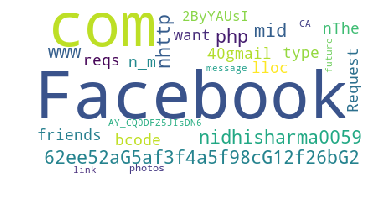


Group :  1 
-------------------


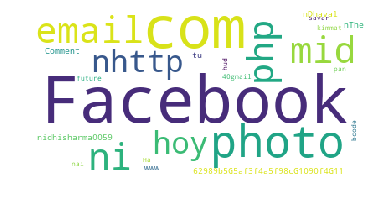


Group :  2 
-------------------


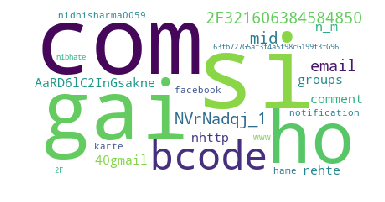

In [31]:
#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    words = ''
    for i in range(len(data)):
        if ( clusters[i] == group):
            words = data[i] + " "

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(words)
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
